In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2022-06-03 14:25:30.154913: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-03 14:25:30.154941: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.9.1
2.9.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [5]:
X_train_full.dtype

dtype('uint8')

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

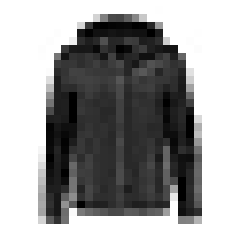

In [7]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Będziemy używać klas numerycznych i nazw.

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

Możemy narysować więcej przykładów treningowych.

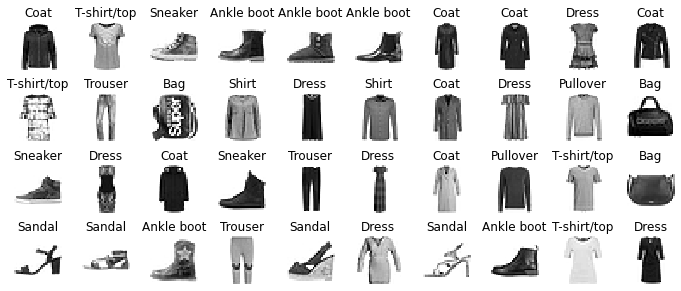

In [10]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad
Porównaj wyniki działań różnych optymalizacji
* 
```python
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
```
* 
```python
Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
```
* 
```python
Adam = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
```

https://keras.io/optimizers/

In [11]:
sgd = keras.optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
adam1 = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
adam2 = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)

optimizers = [sgd, adam1, adam2]
histories = []

for opt in optimizers:
    keras.backend.clear_session()
    np.random.seed(42)
    tf.random.set_seed(42)

    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ])

    model.summary()

    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=opt,
                  metrics=["accuracy"])

    history = model.fit(X_train, y_train, epochs=20,
                        validation_data=(X_valid, y_valid))
    histories.append(history)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


2022-06-03 14:25:34.486160: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-03 14:25:34.486521: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-03 14:25:34.486606: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-06-03 14:25:34.486678: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-06-03 14:25:34.486743: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Epoch 1/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5065 - accuracy: 0.8211 - val_loss: 0.3797 - val_accuracy: 0.8630
Epoch 2/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3756 - accuracy: 0.8629 - val_loss: 0.3536 - val_accuracy: 0.8714
Epoch 3/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3408 - accuracy: 0.8738 - val_loss: 0.3379 - val_accuracy: 0.8746
Epoch 4/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3169 - accuracy: 0.8831 - val_loss: 0.3116 - val_accuracy: 0.8830
Epoch 5/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2993 - accuracy: 0.8876 - val_loss: 0.3044 - val_accuracy: 0.8852
Epoch 6/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2828 - accuracy: 0.8947 - val_loss: 0.3255 - val_accuracy: 0.8820
Epoch 7/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2712 - accuracy: 0.8990 - val_loss: 0.3099 - val_accuracy:

1719/1719 [==============================] - 3s 2ms/step - loss: 0.3496 - accuracy: 0.8765 - val_loss: 0.3498 - val_accuracy: 0.8760
Epoch 5/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3314 - accuracy: 0.8820 - val_loss: 0.3275 - val_accuracy: 0.8816
Epoch 6/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3162 - accuracy: 0.8873 - val_loss: 0.3270 - val_accuracy: 0.8842
Epoch 7/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3041 - accuracy: 0.8913 - val_loss: 0.3141 - val_accuracy: 0.8856
Epoch 8/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2920 - accuracy: 0.8949 - val_loss: 0.3108 - val_accuracy: 0.8918
Epoch 9/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2807 - accuracy: 0.8984 - val_loss: 0.3090 - val_accuracy: 0.8894
Epoch 10/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2710 - accuracy: 0.9016 - val_loss: 0.2983 - val_accuracy: 0.8928
Ep

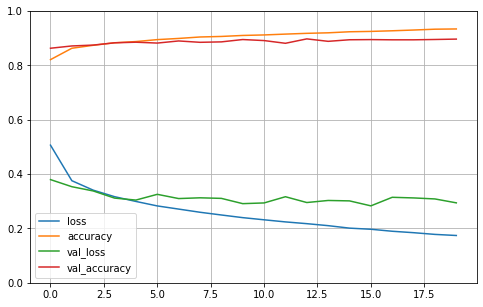

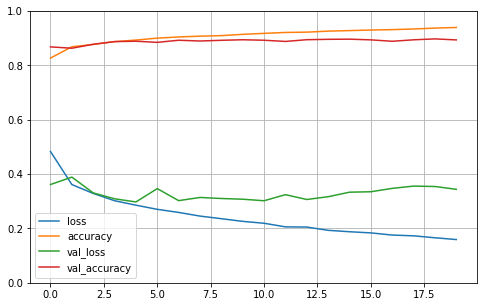

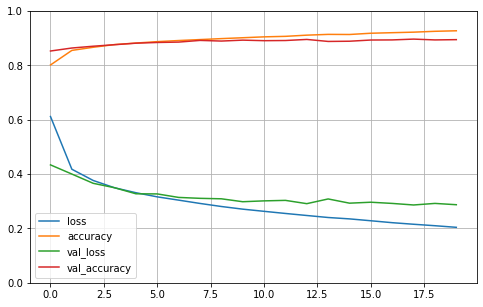

In [12]:
import pandas as pd

for hist in histories:
    pd.DataFrame(hist.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

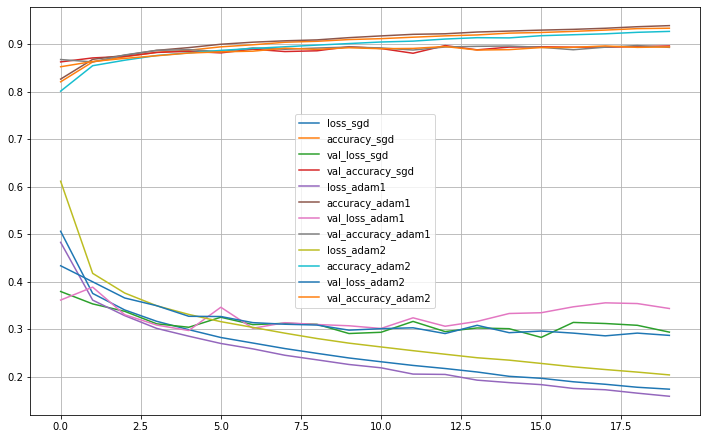

In [14]:
labels = [x + '_sgd' for x in [*histories[0].history.keys()]] + [x + '_adam1' for x in [*histories[1].history.keys()]] + [x + '_adam2' for x in [*histories[2].history.keys()]]
plt.rcParams["figure.figsize"] = (12,7.5)
lines = plt.plot(pd.DataFrame(histories[0].history))
lines2 = plt.plot(pd.DataFrame(histories[1].history))
lines3 = plt.plot(pd.DataFrame(histories[2].history))                                                              
plt.legend(lines + lines2 + lines3, labels);
plt.grid(True)
plt.show()